<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/lstm_thesis_2025_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
# import visualkeras
from sklearn.model_selection import train_test_split

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()


picture_void
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.066_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.032_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.001_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.004_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.01_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.095_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.036_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.009_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.046_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.068_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.078_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.045_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.02_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void/alpha_0.027_void_0.2.csv
/content/

In [ ]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


x_health , y_health , z_health = [] , [] , []

for i in total_health_x_y_z:
  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])


x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.where(z_health < 0 , 0 , z_health )

TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

window_size = 2
for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی = 3 ردیف پشت سر هم
        TOTAL_X_health_vector.append(picture_reshaped[i : i + window_size])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        TOTAL_Target_X_health_vector.append(picture_reshaped[i + window_size]) # (3,)

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1, window_size, 3)
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1, 3)

print(TOTAL_X_health_vector_array.shape)   # (N, 3, 3)
print(TOTAL_Target_X_health_vector_array.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [ ]:
reverse_total_health_x_y_z , reverse_label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      reverse_total_health_x_y_z.append(img)
      reverse_label_health.append(i)


rev_x_health , rev_y_health , rev_z_health = [] , [] , []

for i in reverse_total_health_x_y_z:
  rev_x_health.append(i['x'])
  rev_y_health.append(i['y'])
  rev_z_health.append(i['z'])


rev_x_health = np.array(rev_x_health).reshape(-1 , 16 , 3 , 1 )
rev_y_health = np.array(rev_y_health).reshape(-1 , 16 , 3 , 1 )
rev_z_health = np.array(rev_z_health).reshape(-1 , 16 , 3 , 1 )
rev_z_health = np.where(rev_z_health < 0 , 0 , rev_z_health )

rev_TOTAL_X_health_vector = []
rev_TOTAL_Target_X_health_vector = []

window_size = 2
for picture in rev_z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples,0,-1):
        # ورودی = 3 ردیف پشت سر هم
        rev_TOTAL_X_health_vector.append(picture_reshaped[-(i + window_size):-i])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        rev_TOTAL_Target_X_health_vector.append(picture_reshaped[-i]) # (3,)

rev_TOTAL_X_health_vector = np.array(rev_TOTAL_X_health_vector).reshape(-1, window_size, 3)
rev_TOTAL_Target_X_health_vector = np.array(rev_TOTAL_Target_X_health_vector).reshape(-1, 3)

print(rev_TOTAL_X_health_vector.shape)   # (N, 3, 3)
print(rev_TOTAL_Target_X_health_vector.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [ ]:
rev_x_train , rev_x_test , rev_y_train , rev_y_test = train_test_split(rev_TOTAL_X_health_vector,rev_TOTAL_Target_X_health_vector , test_size=0.3 , random_state = 42 )

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model_forward = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model_forward.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model_forward.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model_forward.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model_forward.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 3s - 71ms/step - loss: 3.6912 - mse: 3.6912 - val_loss: 1.1927 - val_mse: 1.1927
Epoch 2/50
49/49 - 0s - 6ms/step - loss: 0.3880 - mse: 0.3880 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 3/50
49/49 - 1s - 16ms/step - loss: 0.0838 - mse: 0.0838 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 4/50
49/49 - 0s - 9ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 5/50
49/49 - 1s - 11ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 6/50
49/49 - 1s - 11ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 7/50
49/49 - 1s - 21ms/step - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 8/50
49/49 - 1s - 19ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 9/50
49/49 - 1s - 25ms/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 10/50
49/49 - 1s - 26ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0218 - val_mse: 0.0218
E

In [ ]:

# ————— تعریف مدل —————
model_backward = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model_backward.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model_backward.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model_backward.fit(
    rev_x_train, rev_y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = rev_x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model_forward.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 3s - 60ms/step - loss: 3.1802 - mse: 3.1802 - val_loss: 0.4884 - val_mse: 0.4884
Epoch 2/50
49/49 - 0s - 6ms/step - loss: 0.1747 - mse: 0.1747 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 3/50
49/49 - 0s - 6ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 4/50
49/49 - 0s - 6ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 5/50
49/49 - 0s - 6ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 6/50
49/49 - 0s - 6ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 7/50
49/49 - 0s - 5ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 8/50
49/49 - 0s - 6ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 9/50
49/49 - 0s - 6ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 10/50
49/49 - 1s - 11ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 1

In [ ]:
Total_Feature = []
Total_Label_Feature = []

In [ ]:
TOTAL_ERROR_PLAIN_HEALTH = []
Total_Feature = []
Total_Label_Feature = []

window_size = 2
tail_size_config = 5  # اسمش رو عوض کردم تا با متغیر داخل حلقه اشتباه نشه

for picture in z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    # ساخت داده‌های ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x)  # (14, 2, 3)
    new_sample_y_array = np.array(new_sample_y)  # (14, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)  # (1, 2, 3)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)  # (14, 3)

    # محاسبه خطا (MSE عنصری)
    diff_error = (total_y_pre - new_sample_y_array) ** 2  # (14, 3)
    TOTAL_ERROR_PLAIN_HEALTH.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # تبدیل به اسکالر
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی ---
    n = len(diff_error)
    tail_size = min(tail_size_config, n)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_error = np.sum(diff_error) + 1e-8
    tail_error_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_error_sum / total_error

    # --- تعریف نهایی ویژگی‌ها ---
    features = {
        "mse": mse,
        "mean": avg_error,
        "max": max_error,
        "std": std_error,
        "last": last_error,
        "min": min_error,
        "tail_mean": tail_mean,
        "tail_max": tail_max,
        "tail_slope": slope,
        "tail_ratio": tail_ratio,
    }

    Total_Feature.append([
        features["mse"],
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
        features["tail_mean"],
        features["tail_max"],
        features["tail_slope"],
        features["tail_ratio"],
    ])

    Total_Label_Feature.append('0')

In [31]:
rev_TOTAL_ERROR_PLAIN_HEALTH = []
rev_Total_Feature = []
rev_Total_Label_Feature = []

window_size = 2
tail_size = 5  # تعداد فریم‌های انتهایی برای تحلیل

for picture in rev_z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue  # اگر تصویر خیلی کوچیک بود، ردش کن

    # --- ساخت داده‌های معکوس (backward) ---
    new_sample_x, new_sample_y = [], []
    # i از n_samples تا 1 (معکوس)
    for i in range(n_samples, 0, -1):
        start_idx = -(i + window_size)
        end_idx = -i if i != 0 else None
        x_seq = picture_reshaped[start_idx:end_idx]  # طول = window_size
        y_target = picture_reshaped[-i]              # یک فریم

        # بررسی اینکه x_seq واقعاً window_size فریم داشته باشه
        if x_seq.shape[0] == window_size:
            new_sample_x.append(x_seq)
            new_sample_y.append(y_target)

    if len(new_sample_x) == 0:
        continue

    new_sample_x_array = np.array(new_sample_x)  # (T, window_size, 3)
    new_sample_y_array = np.array(new_sample_y)  # (T, 3)

    # --- پیش‌بینی با مدل backward ---
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)  # (1, window_size, 3)
        y_pred = model_backward.predict(t, verbose=0)
        total_y_pre.append(y_pred[0])
    total_y_pre = np.array(total_y_pre)  # (T, 3)

    # --- محاسبه خطا (MSE عنصری) ---
    diff_error = (total_y_pre - new_sample_y_array) ** 2  # shape: (T, 3)
    rev_TOTAL_ERROR_PLAIN_HEALTH.append(diff_error)

    # --- استخراج ویژگی‌های پیشرفته ---
    T = diff_error.shape[0]
    actual_tail = min(tail_size, T)

    # آمارهای کلی
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1]  # آخرین فریم
    min_error = np.min(diff_error)

    # --- ویژگی‌های جدید: تمرکز روی انتهای توالی ---
    tail_errors = diff_error[-actual_tail:]  # آخرین `actual_tail` فریم
    tail_mean = np.mean(tail_errors)
    tail_max = np.max(tail_errors)
    tail_sum = np.sum(tail_errors)
    total_sum = np.sum(diff_error) + 1e-8
    tail_ratio = tail_sum / total_sum

    # شیب خطا در انتهای توالی (آیا خطا داره زیاد می‌شه؟)
    if actual_tail > 1:
        tail_flat = tail_errors.flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        # محاسبه شیب بدون نیاز به کتابخونه
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)  # فقط شیب مثبت مهمه
    else:
        slope = 0.0

    # --- ذخیره ویژگی‌ها ---
    rev_Total_Feature.append([
        mse,
        avg_error,
        max_error,
        std_error,
        last_error.mean(),  # یا last_error.max() اگر بخوای
        min_error,
        tail_mean,
        tail_max,
        tail_ratio,
        slope
    ])
    rev_Total_Label_Feature.append('0')  # '0' = سالم

In [32]:
# --- آماده‌سازی داده‌های خام ---
TOTAL_ERROR_PLAIN_ALPHA = []
total_alpha_x_y_z, label_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            total_alpha_x_y_z.append(img)
            label_alpha.append(i)

x_alpha, y_alpha, z_alpha = [], [], []
for i in total_alpha_x_y_z:
    x_alpha.append(i['x'])
    y_alpha.append(i['y'])
    z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1, 16, 3, 1)
y_alpha = np.array(y_alpha).reshape(-1, 16, 3, 1)
z_alpha = np.array(z_alpha).reshape(-1, 16, 3, 1)
z_alpha = np.where(z_alpha < 0, 0, z_alpha)

# --- پردازش هر تصویر ---
r = 0
window_size = 2  # مطمئن شو این تعریف شده (اگر قبلاً نیست، اینجا هست)

for picture in z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    # ساخت دنباله‌های ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x)  # (T, window_size, 3)
    new_sample_y_array = np.array(new_sample_y)  # (T, 3)

    # پیش‌بینی
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # محاسبه خطا (MSE عنصری)
    diff_error = (total_y_pre - new_sample_y_array) ** 2  # shape: (T, 3)
    TOTAL_ERROR_PLAIN_ALPHA.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل آرایه (3,) به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی (همانند داده‌های سالم) ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)  # فقط شیب مثبت
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره ویژگی‌ها (دقیقاً مانند داده‌های سالم) ---
    Total_Feature.append([
        mse,            # 0
        avg_error,      # 1
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است، نه آرایه
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    Total_Label_Feature.append('1')  # '1' = معیوب

    r += 1

print("تعداد تصاویر پردازش‌شده برای ALPHA:", r)

تعداد تصاویر پردازش‌شده برای ALPHA: 99


In [ ]:
# --- آماده‌سازی داده‌های خام ---
rev_TOTAL_ERROR_PLAIN_ALPHA = []
rev_total_alpha_x_y_z, rev_label_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            rev_total_alpha_x_y_z.append(img)
            rev_label_alpha.append(i)

rev_x_alpha, rev_y_alpha, rev_z_alpha = [], [], []
for i in rev_total_alpha_x_y_z:
    rev_x_alpha.append(i['x'])
    rev_y_alpha.append(i['y'])
    rev_z_alpha.append(i['z'])

rev_x_alpha = np.array(rev_x_alpha).reshape(-1, 16, 3, 1)
rev_y_alpha = np.array(rev_y_alpha).reshape(-1, 16, 3, 1)
rev_z_alpha = np.array(rev_z_alpha).reshape(-1, 16, 3, 1)
rev_z_alpha = np.where(rev_z_alpha < 0, 0, rev_z_alpha)

# --- پردازش معکوس ---
r = 0
window_size = 2  # مطمئن شو تعریف شده

for picture in rev_z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    # --- ساخت دنباله‌های معکوس ---
    new_sample_x, new_sample_y = [], []
    # i از n_samples تا 1 (معکوس)
    for i in range(n_samples, 0, -1):
        start_idx = -(i + window_size)
        end_idx = -i if i != 0 else None
        x_seq = picture_reshaped[start_idx:end_idx]
        y_target = picture_reshaped[-i]

        # بررسی طول x_seq
        if x_seq.shape[0] == window_size:
            new_sample_x.append(x_seq)
            new_sample_y.append(y_target)

    if len(new_sample_x) == 0:
        continue

    new_sample_x_array = np.array(new_sample_x)  # (T, window_size, 3)
    new_sample_y_array = np.array(new_sample_y)  # (T, 3)

    # --- پیش‌بینی با مدل backward ---
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_backward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # --- محاسبه خطا ---
    diff_error = (total_y_pre - new_sample_y_array) ** 2  # (T, 3)
    rev_TOTAL_ERROR_PLAIN_ALPHA.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی (همانند forward) ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره ویژگی‌ها (10 ویژگی — همانند forward) ---
    rev_Total_Feature.append([
        mse,            # 0
        avg_error,      # 1
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    rev_Total_Label_Feature.append('1')  # '1' = معیوب

    r += 1

print("تعداد تصاویر پردازش‌شده (backward ALPHA):", r)

In [34]:
TOTAL_ERROR_PLAIN_VOID = []
total_void_x_y_z, label_void = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []
for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)
z_void = np.where(z_void < 0, 0, z_void)

r = 0
window_size = 2  # مطمئن شو تعریف شده

for picture in z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x)
    new_sample_y_array = np.array(new_sample_y)

    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_VOID.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)  # ✅ اضافه شد!
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی (همانند سالم و ALPHA) ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره 10 ویژگی ---
    Total_Feature.append([
        mse,            # 0
        avg_error,      # 1 ← ✅ اضافه شد
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    Total_Label_Feature.append('1')  # '2' = VOID

    r += 1

print("تعداد تصاویر پردازش‌شده برای VOID:", r)

تعداد تصاویر پردازش‌شده برای VOID: 99


In [35]:
rev_TOTAL_ERROR_PLAIN_VOID = []
rev_total_void_x_y_z, rev_label_void = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            rev_total_void_x_y_z.append(img)
            rev_label_void.append(i)

rev_x_void, rev_y_void, rev_z_void = [], [], []
for i in rev_total_void_x_y_z:
    rev_x_void.append(i['x'])
    rev_y_void.append(i['y'])
    rev_z_void.append(i['z'])

rev_x_void = np.array(rev_x_void).reshape(-1, 16, 3, 1)
rev_y_void = np.array(rev_y_void).reshape(-1, 16, 3, 1)
rev_z_void = np.array(rev_z_void).reshape(-1, 16, 3, 1)
rev_z_void = np.where(rev_z_void < 0, 0, rev_z_void)

r = 0
window_size = 2  # مطمئن شو تعریف شده

for picture in rev_z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    # --- ساخت دنباله‌های معکوس ---
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples, 0, -1):
        start_idx = -(i + window_size)
        end_idx = -i if i != 0 else None
        x_seq = picture_reshaped[start_idx:end_idx]
        y_target = picture_reshaped[-i]

        if x_seq.shape[0] == window_size:
            new_sample_x.append(x_seq)
            new_sample_y.append(y_target)

    if len(new_sample_x) == 0:
        continue

    new_sample_x_array = np.array(new_sample_x)  # (T, window_size, 3)
    new_sample_y_array = np.array(new_sample_y)  # (T, 3)

    # --- پیش‌بینی با مدل BACKWARD (نه forward!) ---
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_backward.predict(t, verbose=0)  # ✅ تغییر به model_backward
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # --- محاسبه خطا ---
    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_VOID.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)  # ✅ اضافه شد
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره 10 ویژگی (همانند forward) ---
    rev_Total_Feature.append([
        mse,            # 0
        avg_error,      # 1
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    rev_Total_Label_Feature.append('1')  # '2' = VOID

    r += 1

print("تعداد تصاویر پردازش‌شده (backward VOID):", r)

تعداد تصاویر پردازش‌شده (backward VOID): 99


In [ ]:
TOTAL_ERROR_PLAIN_VOID_ALPHA = []
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []
for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.where(z_void_alpha < 0, 0, z_void_alpha)

r = 0
window_size = 2  # مطمئن شو تعریف شده

for picture in z_void_alpha[::4]:  # هر 4 تا یکی
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x)
    new_sample_y_array = np.array(new_sample_y)

    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_forward.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_VOID_ALPHA.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)  # ✅ اضافه شد
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره 10 ویژگی ---
    Total_Feature.append([
        mse,            # 0
        avg_error,      # 1 ← ✅ اضافه شد
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    Total_Label_Feature.append('1')  # '3' = VOID_ALPHA

    r += 1
    # if r == 200: break  # فقط اگر واقعاً نیاز داری فعالش کن

print("تعداد تصاویر پردازش‌شده برای VOID_ALPHA:", r)

In [37]:
rev_TOTAL_ERROR_PLAIN_VOID_ALPHA = []
rev_total_void_alpha_x_y_z, rev_label_void_alpha = [], []

# --- جمع‌آوری داده‌های خام ---
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            rev_total_void_alpha_x_y_z.append(img)
            rev_label_void_alpha.append(i)

rev_x_void_alpha, rev_y_void_alpha, rev_z_void_alpha = [], [], []

# ❗ تغییر کلیدی: از rev_total_void_alpha_x_y_z استفاده کن، نه total_void_alpha_x_y_z
for i in rev_total_void_alpha_x_y_z:  # ✅ اینجا اصلاح شد
    rev_x_void_alpha.append(i['x'])
    rev_y_void_alpha.append(i['y'])
    rev_z_void_alpha.append(i['z'])

rev_x_void_alpha = np.array(rev_x_void_alpha).reshape(-1, 16, 3, 1)
rev_y_void_alpha = np.array(rev_y_void_alpha).reshape(-1, 16, 3, 1)
rev_z_void_alpha = np.array(rev_z_void_alpha).reshape(-1, 16, 3, 1)
rev_z_void_alpha = np.where(rev_z_void_alpha < 0, 0, rev_z_void_alpha)

# --- پردازش معکوس ---
r = 0
window_size = 2  # مطمئن شو تعریف شده

for picture in rev_z_void_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size  # = 14

    if n_samples <= 0:
        continue

    new_sample_x, new_sample_y = [], []
    # --- حلقه معکوس ایمن ---
    for i in range(n_samples, 0, -1):
        start_idx = -(i + window_size)
        end_idx = -i if i != 0 else None
        x_seq = picture_reshaped[start_idx:end_idx]
        y_target = picture_reshaped[-i]

        if x_seq.shape[0] == window_size:
            new_sample_x.append(x_seq)
            new_sample_y.append(y_target)

    if len(new_sample_x) == 0:
        continue

    new_sample_x_array = np.array(new_sample_x)
    new_sample_y_array = np.array(new_sample_y)

    # --- پیش‌بینی با مدل BACKWARD ---
    total_y_pre = []
    for seq in new_sample_x_array:
        t = np.expand_dims(seq, axis=0)
        y_pre = model_backward.predict(t, verbose=0)  # ✅ model_backward
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # --- محاسبه خطا ---
    diff_error = (total_y_pre - new_sample_y_array) ** 2
    rev_TOTAL_ERROR_PLAIN_VOID_ALPHA.append(diff_error)

    # --- آمارهای کلی ---
    avg_error = np.mean(diff_error)  # ✅ اضافه شد
    mse = np.sum(diff_error)
    max_error = np.max(diff_error)
    std_error = np.std(diff_error)
    last_error = diff_error[-1].mean()  # ✅ تبدیل به عدد
    min_error = np.min(diff_error)

    # --- ویژگی‌های انتهایی ---
    T = len(diff_error)
    tail_size = min(5, T)

    tail_mean = np.mean(diff_error[-tail_size:])
    tail_max = np.max(diff_error[-tail_size:])

    if tail_size > 1:
        tail_flat = diff_error[-tail_size:].flatten()
        x = np.arange(len(tail_flat))
        y = tail_flat
        slope = np.cov(x, y)[0, 1] / (np.var(x) + 1e-8)
        slope = max(slope, 0.0)
    else:
        slope = 0.0

    total_sum = np.sum(diff_error) + 1e-8
    tail_sum = np.sum(diff_error[-tail_size:])
    tail_ratio = tail_sum / total_sum

    # --- ذخیره 10 ویژگی ---
    rev_Total_Feature.append([
        mse,            # 0
        avg_error,      # 1
        max_error,      # 2
        std_error,      # 3
        last_error,     # 4 ← عدد است
        min_error,      # 5
        tail_mean,      # 6
        tail_max,       # 7
        slope,          # 8
        tail_ratio      # 9
    ])
    rev_Total_Label_Feature.append('1')  # '3' = VOID_ALPHA

    r += 1
    # if r == 200: break  # فقط اگر واقعاً نیاز داری

print("تعداد تصاویر پردازش‌شده (backward VOID_ALPHA):", r)

تعداد تصاویر پردازش‌شده (backward VOID_ALPHA): 99


In [56]:
np.array(TOTAL_ERROR_PLAIN_HEALTH ).shape

(99, 14, 3)

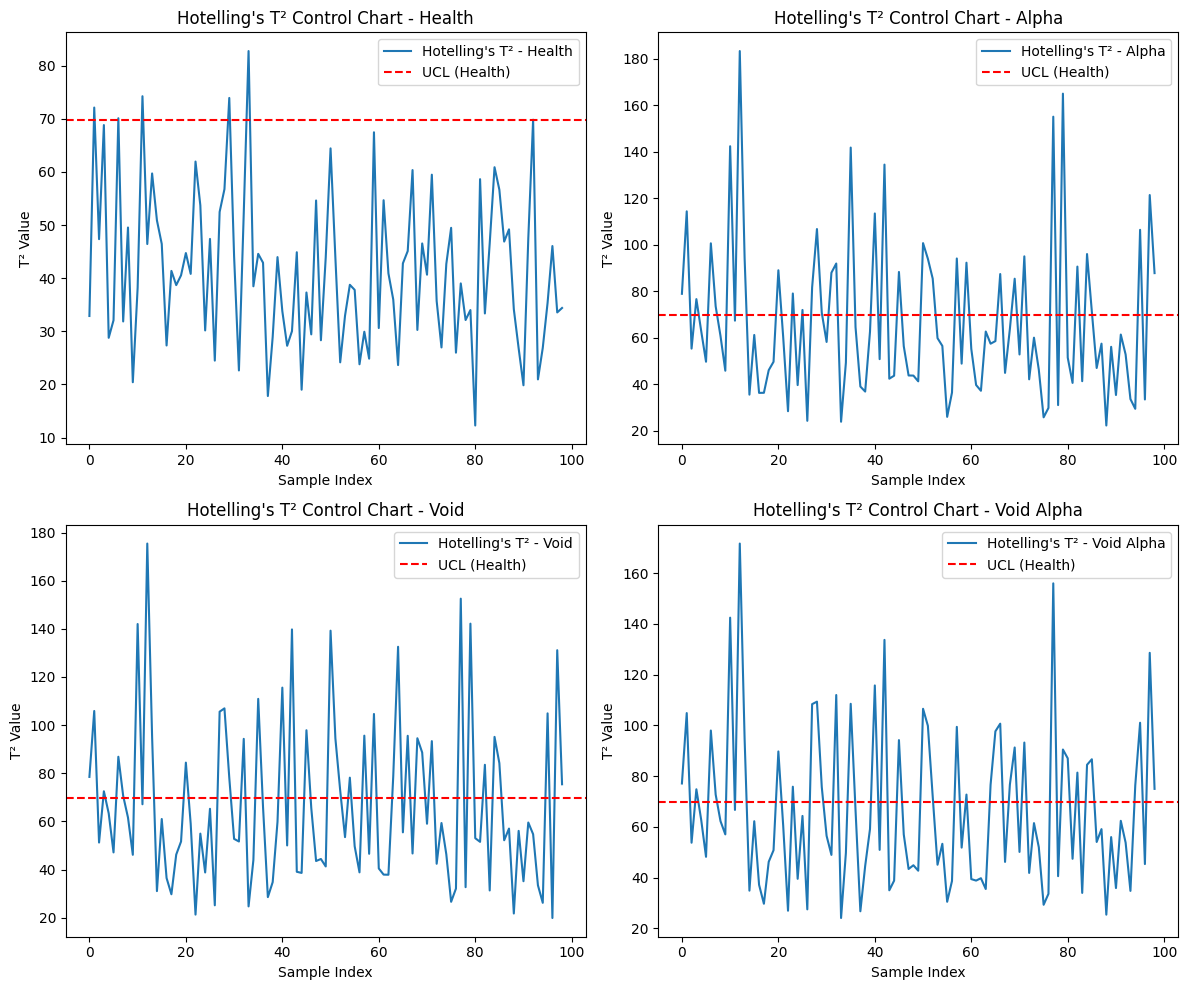

Anomalous points in Alpha Data: [ 0  1  3  6  7 10 12 13 20 23 25 27 28 29 31 32 35 40 42 45 50 51 52 57
 59 66 69 71 77 79 82 84 85 95 97 98]
Anomalous points in Void Data: [ 0  1  3  6  7 10 12 13 20 27 28 29 32 35 40 42 45 50 51 52 54 57 59 63
 64 66 68 69 71 77 79 82 84 85 95 97 98]
Anomalous points in Void Alpha Data: [ 0  1  3  6  7 10 12 13 20 23 27 28 29 32 35 40 42 45 50 51 52 57 59 64
 65 66 68 69 71 77 79 80 82 84 85 94 95 97 98]


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# فرض کنید داده‌ها به صورت زیر وارد شده‌اند
# داده‌ها به شکل یک آرایه با 99 نمونه و 42 ویژگی می‌باشد (برای هر گروه 99 نمونه و 42 ویژگی)
data_health = np.array(TOTAL_ERROR_PLAIN_HEALTH).reshape(-1, 42)  # TOTAL_ERROR_PLAIN_HEALTH
data_alpha = np.array(TOTAL_ERROR_PLAIN_ALPHA).reshape(-1, 42)  # TOTAL_ERROR_PLAIN_ALPHA
data_void = np.array(TOTAL_ERROR_PLAIN_VOID).reshape(-1, 42)  # TOTAL_ERROR_PLAIN_VOID
data_void_alpha = np.array(TOTAL_ERROR_PLAIN_VOID_ALPHA).reshape(-1, 42)  # TOTAL_ERROR_PLAIN_VOID_ALPHA

# استانداردسازی داده‌ها
scaler = StandardScaler()

data_health_scaled = scaler.fit_transform(data_health)
data_alpha_scaled = scaler.fit_transform(data_alpha)
data_void_scaled = scaler.fit_transform(data_void)
data_void_alpha_scaled = scaler.fit_transform(data_void_alpha)

# محاسبه ماتریس کوواریانس برای گروه `TOTAL_ERROR_PLAIN_HEALTH`
cov_matrix_health = np.cov(data_health_scaled.T)

# محاسبه معکوس ماتریس کوواریانس
cov_matrix_inv_health = np.linalg.inv(cov_matrix_health)

# محاسبه مقدار Hotelling’s T² برای گروه `TOTAL_ERROR_PLAIN_HEALTH`
t_squared_health = np.diag(np.dot(np.dot(data_health_scaled, cov_matrix_inv_health), data_health_scaled.T))

# محاسبه UCL برای گروه `TOTAL_ERROR_PLAIN_HEALTH` (با استفاده از 95% percentile)
UCL_health = np.percentile(t_squared_health, 95)

# محاسبه مقدار Hotelling’s T² برای گروه‌های دیگر
t_squared_alpha = np.diag(np.dot(np.dot(data_alpha_scaled, cov_matrix_inv_health), data_alpha_scaled.T))
t_squared_void = np.diag(np.dot(np.dot(data_void_scaled, cov_matrix_inv_health), data_void_scaled.T))
t_squared_void_alpha = np.diag(np.dot(np.dot(data_void_alpha_scaled, cov_matrix_inv_health), data_void_alpha_scaled.T))

# مقایسه با UCL برای شناسایی ناهنجاری‌ها
anomalies_alpha = np.where(t_squared_alpha > UCL_health)[0]
anomalies_void = np.where(t_squared_void > UCL_health)[0]
anomalies_void_alpha = np.where(t_squared_void_alpha > UCL_health)[0]

# رسم نمودار کنترل برای گروه‌های مختلف

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# نمودار کنترل برای Health
axs[0, 0].plot(t_squared_health, label="Hotelling's T² - Health")
axs[0, 0].axhline(UCL_health, color='r', linestyle='--', label="UCL (Health)")
axs[0, 0].set_title("Hotelling's T² Control Chart - Health")
axs[0, 0].set_xlabel("Sample Index")
axs[0, 0].set_ylabel("T² Value")
axs[0, 0].legend()

# نمودار کنترل برای Alpha
axs[0, 1].plot(t_squared_alpha, label="Hotelling's T² - Alpha")
axs[0, 1].axhline(UCL_health, color='r', linestyle='--', label="UCL (Health)")
axs[0, 1].set_title("Hotelling's T² Control Chart - Alpha")
axs[0, 1].set_xlabel("Sample Index")
axs[0, 1].set_ylabel("T² Value")
axs[0, 1].legend()

# نمودار کنترل برای Void
axs[1, 0].plot(t_squared_void, label="Hotelling's T² - Void")
axs[1, 0].axhline(UCL_health, color='r', linestyle='--', label="UCL (Health)")
axs[1, 0].set_title("Hotelling's T² Control Chart - Void")
axs[1, 0].set_xlabel("Sample Index")
axs[1, 0].set_ylabel("T² Value")
axs[1, 0].legend()

# نمودار کنترل برای Void Alpha
axs[1, 1].plot(t_squared_void_alpha, label="Hotelling's T² - Void Alpha")
axs[1, 1].axhline(UCL_health, color='r', linestyle='--', label="UCL (Health)")
axs[1, 1].set_title("Hotelling's T² Control Chart - Void Alpha")
axs[1, 1].set_xlabel("Sample Index")
axs[1, 1].set_ylabel("T² Value")
axs[1, 1].legend()

# تنظیم فاصله‌ها بین نمودارها
plt.tight_layout()
plt.show()

# چاپ نقاط ناهنجار برای هر گروه
print(f"Anomalous points in Alpha Data: {anomalies_alpha}")
print(f"Anomalous points in Void Data: {anomalies_void}")
print(f"Anomalous points in Void Alpha Data: {anomalies_void_alpha}")


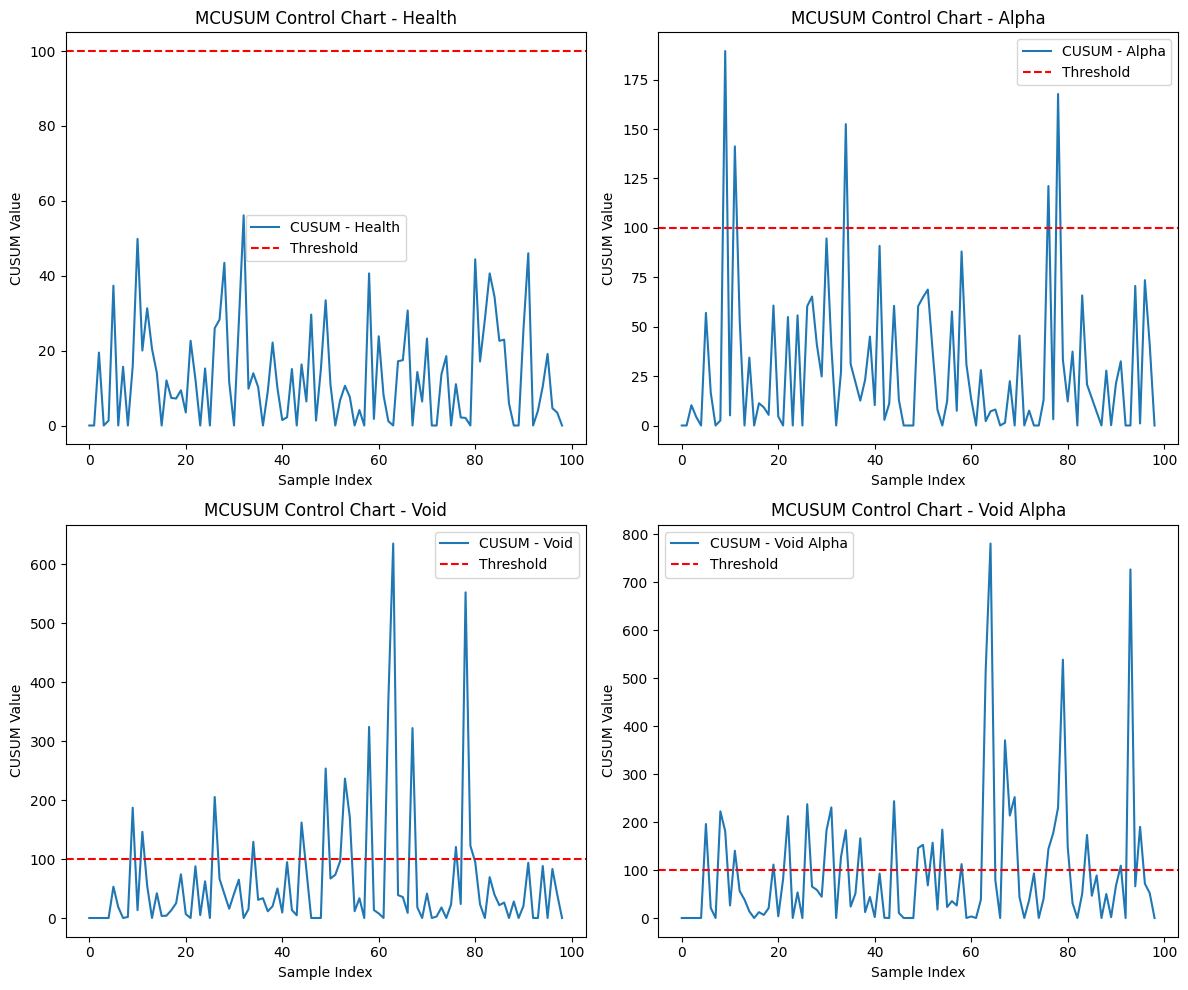

Anomalous points in Alpha Data: [5, 9, 11, 12, 19, 22, 24, 26, 27, 30, 34, 41, 44, 49, 50, 51, 56, 58, 76, 78, 83, 94, 96]
Anomalous points in Void Data: [5, 9, 11, 12, 19, 22, 24, 26, 27, 31, 34, 39, 41, 44, 45, 49, 50, 51, 52, 53, 54, 58, 62, 63, 67, 76, 78, 79, 80, 83, 91, 94, 96]
Anomalous points in Void Alpha Data: [5, 8, 9, 11, 12, 19, 21, 22, 24, 26, 27, 28, 30, 31, 33, 34, 36, 37, 41, 44, 49, 50, 51, 52, 54, 58, 63, 64, 65, 67, 68, 69, 73, 76, 77, 78, 79, 80, 83, 84, 86, 88, 90, 91, 93, 94, 95, 96, 97]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def mcusum(data, k=2, h=50):  # تغییر در مقدار حساسیت و آستانه
    """
    پیاده‌سازی MCUSUM برای شناسایی ناهنجاری‌ها
    :param data: داده‌های ورودی
    :param k: پارامتر حساسیت (معمولاً عددی نزدیک به صفر)
    :param h: آستانه کنترل
    :return: مقادیر CUSUM و نقاط ناهنجار
    """
    S = np.zeros(len(data))  # مقدار CUSUM اولیه
    anomalies = []  # لیست نقاط ناهنجار

    # محاسبه تغییرات
    delta = np.diff(data)  # محاسبه تغییرات بین داده‌های متوالی

    # محاسبه CUSUM
    for t in range(1, len(delta)):
        S[t] = max(0, S[t-1] + delta[t] - k)

        # شناسایی ناهنجاری‌ها بر اساس آستانه
        if S[t] > h:
            anomalies.append(t)

    return S, anomalies

# فرض کنید داده‌ها به صورت زیر وارد شده‌اند
# برای گروه `HEALTH`
data_health = np.array(TOTAL_ERROR_PLAIN_HEALTH).reshape(-1, 42)  # داده‌های HEALTH

# 1. **استانداردسازی داده‌های `HEALTH`**
scaler = StandardScaler()
data_health_scaled = scaler.fit_transform(data_health)  # نرمال‌سازی فقط بر اساس داده‌های HEALTH

# 2. **محاسبه مقدار T² برای داده‌های `HEALTH`**
t_squared_health = np.diag(np.dot(np.dot(data_health_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_health_scaled.T))

# 3. **آموزش مدل با استفاده از داده‌های `HEALTH`**
S_health, anomalies_health = mcusum(t_squared_health)

# 4. **بررسی داده‌های گروه‌های دیگر (مثل ALPHA، VOID، VOID_ALPHA)**

# داده‌ها برای گروه‌های دیگر
data_alpha = np.array(TOTAL_ERROR_PLAIN_ALPHA).reshape(-1, 42)  # داده‌های ALPHA
data_void = np.array(TOTAL_ERROR_PLAIN_VOID).reshape(-1, 42)  # داده‌های VOID
data_void_alpha = np.array(TOTAL_ERROR_PLAIN_VOID_ALPHA).reshape(-1, 42)  # داده‌های VOID_ALPHA

# 5. **نرمال‌سازی گروه‌های دیگر بر اساس داده‌های `HEALTH`**
data_alpha_scaled = scaler.transform(data_alpha)  # نرمال‌سازی بر اساس داده‌های HEALTH
data_void_scaled = scaler.transform(data_void)  # نرمال‌سازی بر اساس داده‌های HEALTH
data_void_alpha_scaled = scaler.transform(data_void_alpha)  # نرمال‌سازی بر اساس داده‌های HEALTH

# محاسبه T² برای داده‌های گروه‌های دیگر
t_squared_alpha = np.diag(np.dot(np.dot(data_alpha_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_alpha_scaled.T))
t_squared_void = np.diag(np.dot(np.dot(data_void_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_void_scaled.T))
t_squared_void_alpha = np.diag(np.dot(np.dot(data_void_alpha_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_void_alpha_scaled.T))

# بررسی ناهنجاری‌ها برای گروه‌های دیگر
S_alpha, anomalies_alpha = mcusum(t_squared_alpha)
S_void, anomalies_void = mcusum(t_squared_void)
S_void_alpha, anomalies_void_alpha = mcusum(t_squared_void_alpha)

# 6. **رسم نمودارهای CUSUM برای گروه‌های مختلف**

# تنظیم شکل برای چندین نمودار
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# نمودار CUSUM برای `HEALTH`
axs[0, 0].plot(S_health, label="CUSUM - Health")
axs[0, 0].axhline(100, color='r', linestyle='--', label="Threshold")
axs[0, 0].set_title("MCUSUM Control Chart - Health")
axs[0, 0].set_xlabel("Sample Index")
axs[0, 0].set_ylabel("CUSUM Value")
axs[0, 0].legend()

# نمودار CUSUM برای `ALPHA`
axs[0, 1].plot(S_alpha, label="CUSUM - Alpha")
axs[0, 1].axhline(100, color='r', linestyle='--', label="Threshold")
axs[0, 1].set_title("MCUSUM Control Chart - Alpha")
axs[0, 1].set_xlabel("Sample Index")
axs[0, 1].set_ylabel("CUSUM Value")
axs[0, 1].legend()

# نمودار CUSUM برای `VOID`
axs[1, 0].plot(S_void, label="CUSUM - Void")
axs[1, 0].axhline(100, color='r', linestyle='--', label="Threshold")
axs[1, 0].set_title("MCUSUM Control Chart - Void")
axs[1, 0].set_xlabel("Sample Index")
axs[1, 0].set_ylabel("CUSUM Value")
axs[1, 0].legend()

# نمودار CUSUM برای `VOID_ALPHA`
axs[1, 1].plot(S_void_alpha, label="CUSUM - Void Alpha")
axs[1, 1].axhline(100, color='r', linestyle='--', label="Threshold")
axs[1, 1].set_title("MCUSUM Control Chart - Void Alpha")
axs[1, 1].set_xlabel("Sample Index")
axs[1, 1].set_ylabel("CUSUM Value")
axs[1, 1].legend()

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()

# چاپ نقاط ناهنجار برای گروه‌های مختلف
print(f"Anomalous points in Alpha Data: {anomalies_alpha}")
print(f"Anomalous points in Void Data: {anomalies_void}")
print(f"Anomalous points in Void Alpha Data: {anomalies_void_alpha}")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def mewma(data, lambda_=0.1, h=50):  # کاهش lambda و آستانه
    """
    پیاده‌سازی MEWMA برای شناسایی ناهنجاری‌ها
    :param data: داده‌های ورودی
    :param lambda_: پارامتر نمایی
    :param h: آستانه کنترل
    :return: مقادیر MEWMA و نقاط ناهنجار
    """
    Z = np.zeros(len(data))  # مقدار اولیه MEWMA
    anomalies = []  # لیست نقاط ناهنجار

    # محاسبه MEWMA
    for t in range(1, len(data)):
        Z[t] = lambda_ * Z[t-1] + (1 - lambda_) * data[t]

        # شناسایی ناهنجاری‌ها بر اساس آستانه
        if abs(Z[t]) > h:
            anomalies.append(t)

    return Z, anomalies

# فرض کنید داده‌ها به صورت زیر وارد شده‌اند
# برای گروه `HEALTH`
data_health = np.array(TOTAL_ERROR_PLAIN_HEALTH).reshape(-1, 42)  # داده‌های HEALTH

# 1. **استانداردسازی داده‌های `HEALTH`**
scaler = StandardScaler()
data_health_scaled = scaler.fit_transform(data_health)  # نرمال‌سازی فقط بر اساس داده‌های HEALTH

# 2. **محاسبه مقدار T² برای داده‌های `HEALTH`**
t_squared_health = np.diag(np.dot(np.dot(data_health_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_health_scaled.T))

# 3. **آموزش مدل با استفاده از داده‌های `HEALTH`**
Z_health, anomalies_health = mewma(t_squared_health)

# 4. **بررسی داده‌های گروه‌های دیگر (مثل ALPHA، VOID، VOID_ALPHA)**

# داده‌ها برای گروه‌های دیگر
data_alpha = np.array(TOTAL_ERROR_PLAIN_ALPHA).reshape(-1, 42)  # داده‌های ALPHA
data_void = np.array(TOTAL_ERROR_PLAIN_VOID).reshape(-1, 42)  # داده‌های VOID
data_void_alpha = np.array(TOTAL_ERROR_PLAIN_VOID_ALPHA).reshape(-1, 42)  # داده‌های VOID_ALPHA

# 5. **نرمال‌سازی گروه‌های دیگر بر اساس داده‌های `HEALTH`**
data_alpha_scaled = scaler.transform(data_alpha)  # نرمال‌سازی بر اساس داده‌های HEALTH
data_void_scaled = scaler.transform(data_void)  # نرمال‌سازی بر اساس داده‌های HEALTH
data_void_alpha_scaled = scaler.transform(data_void_alpha)  # نرمال‌سازی بر اساس داده‌های HEALTH

# محاسبه T² برای داده‌های گروه‌های دیگر
t_squared_alpha = np.diag(np.dot(np.dot(data_alpha_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_alpha_scaled.T))
t_squared_void = np.diag(np.dot(np.dot(data_void_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_void_scaled.T))
t_squared_void_alpha = np.diag(np.dot(np.dot(data_void_alpha_scaled, np.linalg.inv(np.cov(data_health_scaled.T))), data_void_alpha_scaled.T))

# بررسی ناهنجاری‌ها برای گروه‌های دیگر
Z_alpha, anomalies_alpha = mewma(t_squared_alpha)
Z_void, anomalies_void = mewma(t_squared_void)
Z_void_alpha, anomalies_void_alpha = mewma(t_squared_void_alpha)

# 6. **رسم نمودارهای MEWMA برای گروه‌های مختلف**

# تنظیم شکل برای چندین نمودار
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# نمودار MEWMA برای `HEALTH`
axs[0, 0].plot(Z_health, label="MEWMA - Health")
axs[0, 0].axhline(50, color='r', linestyle='--', label="Threshold")
axs[0, 0].set_title("MEWMA Control Chart - Health")
axs[0, 0].set_xlabel("Sample Index")
axs[0, 0].set_ylabel("MEWMA Value")
axs[0, 0].legend()

# نمودار MEWMA برای `ALPHA`
axs[0, 1].plot(Z_alpha, label="MEWMA - Alpha")
axs[0, 1].axhline(50, color='r', linestyle='--', label="Threshold")
axs[0, 1].set_title("MEWMA Control Chart - Alpha")
axs[0, 1].set_xlabel("Sample Index")
axs[0, 1].set_ylabel("MEWMA Value")
axs[0, 1].legend()

# نمودار MEWMA برای `VOID`
axs[1, 0].plot(Z_void, label="MEWMA - Void")
axs[1, 0].axhline(50, color='r', linestyle='--', label="Threshold")
axs[1, 0].set_title("MEWMA Control Chart - Void")
axs[1, 0].set_xlabel("Sample Index")
axs[1, 0].set_ylabel("MEWMA Value")
axs[1, 0].legend()

# نمودار MEWMA برای `VOID_ALPHA`
axs[1, 1].plot(Z_void_alpha, label="MEWMA - Void Alpha")
axs[1, 1].axhline(50, color='r', linestyle='--', label="Threshold")
axs[1, 1].set_title("MEWMA Control Chart - Void Alpha")
axs[1, 1].set_xlabel("Sample Index")
axs[1, 1].set_ylabel("MEWMA Value")
axs[1, 1].legend()

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()

# چاپ نقاط ناهنجار برای گروه‌های مختلف
print(f"Anomalous points in Alpha Data: {anomalies_alpha}")
print(f"Anomalous points in Void Data: {anomalies_void}")
print(f"Anomalous points in Void Alpha Data: {anomalies_void_alpha}")


NameError: name 'TOTAL_ERROR_PLAIN_HEALTH' is not defined

In [38]:
X = np.array(Total_Feature)
y = np.array(Total_Label_Feature)

In [39]:
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100)
# model.fit(X, y)

In [40]:
# تقسیم 80% آموزش، 20% تست
X_train_end, X_test_end, y_train_end, y_test_end = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
# ساخت و آموزش مدل
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_end, y_train_end)

RandomForestClassifier(n_estimators=200, random_state=42)

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [51]:
# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test_end)

# چاپ گزارش کامل
print("\n" + "="*60)
print("📊 گزارش طبقه‌بندی")
print("="*60)
print(classification_report(y_test_end, y_pred,))


📊 گزارش طبقه‌بندی
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        20
           1       0.77      0.95      0.85        60

    accuracy                           0.75        80
   macro avg       0.64      0.55      0.54        80
weighted avg       0.70      0.75      0.70        80



In [52]:
confusion_matrix(y_test_end, y_pred)

array([[ 3, 17],
       [ 3, 57]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def multi_plot_error_surface(error_surface1 , error_surface2 , error_surface3 , error_surface4 , title=["health","alpha","void","void_alpha"]):
    nx, ny = error_surface1.shape

    x = np.arange(nx)   # طول (0..13)
    y = np.arange(ny)   # عرض (0..2)

    X, Y = np.meshgrid(x, y, indexing="ij")
    Z1 = error_surface1
    Z2 = error_surface2
    Z3 = error_surface3
    Z4 = error_surface4

    # نقاط اولیه
    points = np.column_stack([X.ravel(), Y.ravel()])
    values1 = Z1.ravel()
    values2 = Z2.ravel()
    values3 = Z3.ravel()
    values4 = Z4.ravel()

    # شبکه ریزتر برای نرمی
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    XI, YI = np.meshgrid(xi, yi)

    ZI = griddata(points, values1, (XI, YI), method='cubic')
    ZII = griddata(points, values2, (XI, YI), method='cubic')
    ZIII = griddata(points, values3, (XI, YI), method='cubic')
    ZIIII = griddata(points, values4, (XI, YI), method='cubic')

    fig = plt.figure(figsize=(12,20))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax3 = fig.add_subplot(221, projection='3d')
    ax4 = fig.add_subplot(222, projection='3d')

    surf1 = ax1.plot_surface(XI, YI, ZI, cmap="viridis", linewidth=0, antialiased=True)
    surf2 = ax2.plot_surface(XI, YI, ZII, cmap="viridis", linewidth=0, antialiased=True)
    surf3 = ax3.plot_surface(XI, YI, ZIII, cmap="viridis", linewidth=0, antialiased=True)
    surf4 = ax4.plot_surface(XI, YI, ZIIII, cmap="viridis", linewidth=0, antialiased=True)

    ax1.set_xlabel("Length (x)")
    ax1.set_ylabel("Width (y)")
    ax1.set_zlabel("Error (z)")
    ax1.set_title(title[0])

    ax2.set_xlabel("Length (x)")
    ax2.set_ylabel("Width (y)")
    ax2.set_zlabel("Error (z)")
    ax2.set_title(title[1])

    ax3.set_xlabel("Length (x)")
    ax3.set_ylabel("Width (y)")
    ax3.set_zlabel("Error (z)")
    ax3.set_title(title[2])

    ax4.set_xlabel("Length (x)")
    ax4.set_ylabel("Width (y)")
    ax4.set_zlabel("Error (z)")
    ax4.set_title(title[3])



    fig.colorbar(surf1, shrink=0.5, aspect=5)
    fig.colorbar(surf2, shrink=0.5, aspect=5)
    fig.colorbar(surf3, shrink=0.5, aspect=5)
    fig.colorbar(surf4, shrink=0.5, aspect=5)



    plt.show()

    print("*************** 2D ***************")

    fig2 = plt.figure(figsize=(10,10))
    ax21 = fig2.add_subplot(121)
    ax22 = fig2.add_subplot(122)
    ax23 = fig2.add_subplot(221)
    ax24 = fig2.add_subplot(222)

    error_surface1=np.rot90(error_surface1)
    ax21.imshow(error_surface1)
    ax21.set_title("remain errors in health")
    error_surface2=np.rot90(error_surface2)
    ax22.imshow(error_surface2)
    ax22.set_title("remain errors in alpha")
    error_surface3=np.rot90(error_surface3)
    ax23.imshow(error_surface3)
    ax23.set_title("remain errors in void")
    error_surface4=np.rot90(error_surface4)
    ax24.imshow(error_surface4)
    ax24.set_title("remain errors in void-alpha")


    plt.show()


In [ ]:
j = 0
for i in range(len(TOTAL_ERROR_PLAIN_ALPHA)):
  multi_plot_error_surface(TOTAL_ERROR_PLAIN_HEALTH[j] ,TOTAL_ERROR_PLAIN_ALPHA[j] , TOTAL_ERROR_PLAIN_VOID[j] , TOTAL_ERROR_PLAIN_VOID_ALPHA[j] ,title=["remain errors in health","remain errors in alpha","remain errors in void","remain errors in void_alpha"])

  if j > 200:
    break

  print("//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")
  multi_plot_error_surface(rev_TOTAL_ERROR_PLAIN_HEALTH[j] ,rev_TOTAL_ERROR_PLAIN_ALPHA[j] , rev_TOTAL_ERROR_PLAIN_VOID[j] , rev_TOTAL_ERROR_PLAIN_VOID_ALPHA[j] ,title=["remain errors in health from back lstm","remain errors in alpha from back lstm","remain errors in void from back lstm","remain errors in void_alpha from back lstm"])
  j += 5


In [ ]:
import numpy as np

# --- مرحله 1: آموزش روی داده‌های سالم ---
X = np.array([mat.flatten() for mat in TOTAL_ERROR_PLAIN_HEALTH])  # (99, 42)
mu = np.mean(X, axis=0)          # (42,)
S = np.cov(X, rowvar=False)      # (42, 42)
S_inv = np.linalg.inv(S)

p = 42
N = 99

# --- مرحله 2: تنظیم پارامترهای MCUSUM ---
# delta: اندازه تغییری که می‌خواهیم تشخیص دهیم (در هر بعد)
# مثلاً فرض کنیم می‌خواهیم تغییر 0.2 در خطا را ببینیم
delta_magnitude = 0.2
delta = np.full(p, delta_magnitude)  # (42,) — می‌توانی جهت را هم تغییر دهی

# k: پارامتر انحراف (معمولاً نصف delta در جهت ماهالانوبیس)
# ساده‌تر: k = 0.5 * delta.T @ S_inv @ delta
k = 0.5 * delta @ S_inv @ delta

# H: آستانه هشدار — معمولاً بین 5 تا 15 (برای p=42، مقدار بزرگ‌تر نیاز است)
# یک روش تجربی: H = 5 * p یا H = 10 * sqrt(p)
H = 10 * np.sqrt(p)  # ≈ 65 برای p=42

print(f"MCUSUM تنظیم شد: k={k:.2f}, H={H:.2f}")

# --- مرحله 3: کلاس MCUSUM ---
class MCUSUMDetector:
    def __init__(self, mu, S_inv, delta, k, H):
        self.mu = mu
        self.S_inv = S_inv
        self.delta = delta
        self.k = k
        self.H = H
        self.C = np.zeros_like(mu)  # بردار انباشته

    def update(self, x):
        """x: ماتریس (14,3) یا بردار (42,)"""
        if x.ndim == 2:
            x = x.flatten()
        e = x - self.mu
        # به‌روزرسانی بردار C (عنصری)
        self.C = np.maximum(0, self.C + e - 0.5 * self.delta)
        # محاسبه آماره T
        T = self.C @ self.S_inv @ self.C
        alarm = T > self.H
        return alarm, T, self.C.copy()

    def reset(self):
        self.C = np.zeros_like(self.mu)

# --- استفاده ---
detector = MCUSUMDetector(mu, S_inv, delta, k, H)

# مثال: پردازش یک دنباله از ماتریس‌ها
# for mat in new_matrices_sequence:
#     alarm, T_val, C_vec = detector.update(mat)
#     if alarm:
#         print("⚠️ ناهنجاری شناسایی شد!")

In [ ]:
# مثال: پردازش یک دنباله از ماتریس‌ها
new_matrices_sequence = TOTAL_ERROR_PLAIN_HEALTH
r = 0
for mat in new_matrices_sequence:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        # print("⚠️ ناهنجاری شناسایی شد!")
        r += 1
print(r)

In [ ]:
# مثال: پردازش یک دنباله از ماتریس‌ها
new_matrices_sequence = TOTAL_ERROR_PLAIN_VOID_ALPHA
r = 0
for mat in new_matrices_sequence:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        # print("⚠️ ناهنجاری شناسایی شد!")
        r += 1
print(r)

In [ ]:
# مثال: پردازش یک دنباله از ماتریس‌ها
new_matrices_sequence = TOTAL_ERROR_PLAIN_VOID
r = 0
for mat in new_matrices_sequence:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        # print("⚠️ ناهنجاری شناسایی شد!")
        r += 1
print(r)

In [ ]:
import numpy as np

# --- آموزش MCUSUM (همانند قبل) ---
X = np.array([mat.flatten() for mat in TOTAL_ERROR_PLAIN_HEALTH])
mu = np.mean(X, axis=0)
S = np.cov(X, rowvar=False)
S_inv = np.linalg.inv(S)

p = 42
delta_magnitude = 0.2
delta = np.full(p, delta_magnitude)
k = 0.5 * delta @ S_inv @ delta
H = 10 * np.sqrt(p)

print(f"MCUSUM تنظیم شد: k={k:.2f}, H={H:.2f}")

class MCUSUMDetector:
    def __init__(self, mu, S_inv, delta, k, H):
        self.mu = mu
        self.S_inv = S_inv
        self.delta = delta
        self.k = k
        self.H = H
        self.C = np.zeros_like(mu)

    def update(self, x):
        if x.ndim == 2:
            x = x.flatten()
        e = x - self.mu
        self.C = np.maximum(0, self.C + e - 0.5 * self.delta)
        T = self.C @ self.S_inv @ self.C
        alarm = T > self.H
        return alarm, T, self.C.copy()

    def reset(self):
        self.C = np.zeros_like(self.mu)

# --- ساخت دتکتور ---
detector = MCUSUMDetector(mu, S_inv, delta, k, H)

# -------------------------------------------------
# تست 1: داده‌های سالم
# -------------------------------------------------
detector.reset()  # ✅ حالت قبلی پاک شود
r = 0
for mat in TOTAL_ERROR_PLAIN_HEALTH:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        r += 1
print("سالم (باید نزدیک 0 باشه):", r)

# -------------------------------------------------
# تست 2: VOID_ALPHA
# -------------------------------------------------
detector.reset()  # ✅ حالت قبلی پاک شود
r = 0
for mat in TOTAL_ERROR_PLAIN_VOID_ALPHA:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        r += 1
print("VOID_ALPHA:", r)

# -------------------------------------------------
# تست 3: VOID
# -------------------------------------------------
detector.reset()  # ✅ حالت قبلی پاک شود
r = 0
for mat in TOTAL_ERROR_PLAIN_VOID:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        r += 1
print("VOID:", r)

# -------------------------------------------------
# تست 4: ALPHA (اگر داری)
# -------------------------------------------------
if 'TOTAL_ERROR_PLAIN_ALPHA' in globals():
    detector.reset()
    r = 0
    for mat in TOTAL_ERROR_PLAIN_ALPHA:
        alarm, _, _ = detector.update(mat)
        if alarm:
            r += 1
    print("ALPHA:", r)

In [ ]:
detector.reset()  # ✅ حالت قبلی پاک شود
r = 0
for mat in TOTAL_ERROR_PLAIN_ALPHA:
    alarm, T_val, C_vec = detector.update(mat)
    if alarm:
        r += 1
print("VOID:", r)


In [ ]:
import numpy as np

# ============================================================
# 1. آموزش روی داده‌های سالم
# ============================================================
X = np.array([mat.flatten() for mat in TOTAL_ERROR_PLAIN_HEALTH])  # (N, 42)
N, p = X.shape  # N=99, p=42

mu = np.mean(X, axis=0)          # (42,)
S = np.cov(X, rowvar=False)      # (42, 42)

print(f"✅ آموزش MEWMA: {N} نمونه سالم، بعد = {p}")

# ============================================================
# 2. تنظیم پارامترهای MEWMA
# ============================================================
lambda_ = 0.15  # پارامتر هموارسازی (معمولاً 0.1 تا 0.3)
               # هرچه کوچک‌تر باشد، حساس‌تر به تغییرات بلندمدت

# محاسبه آستانه کنترل (UCL) بر اساس تقریب مجانبی
# فرمول استاندارد:
# UCL = (lambda_ / (2 - lambda_)) * (1 - (1 - lambda_)**(2 * N)) * chi2_{p, 0.99}
# ولی برای سادگی و N بزرگ، از تقریب زیر استفاده می‌کنیم:

from math import sqrt

# chi2_{42, 0.99} ≈ 66.77
chi2_99 = 66.77
UCL = (lambda_ / (2 - lambda_)) * chi2_99

print(f"MEWMA تنظیم شد: λ={lambda_:.1f}, UCL={UCL:.2f}")

# ============================================================
# 3. کلاس MEWMA
# ============================================================
class MEWMADetector:
    def __init__(self, mu, S, lambda_, UCL):
        self.mu = mu
        self.S_inv = np.linalg.inv(S)
        self.lambda_ = lambda_
        self.UCL = UCL
        self.Z = np.zeros_like(mu)  # بردار وضعیت جاری

    def update(self, x):
        """x: ماتریس (14,3) یا بردار (42,)"""
        if x.ndim == 2:
            x = x.flatten()
        # به‌روزرسانی بردار Z
        self.Z = (1 - self.lambda_) * self.Z + self.lambda_ * (x - self.mu)
        # آماره T² ماهالانوبیس
        T2 = self.Z @ self.S_inv @ self.Z
        alarm = T2 > self.UCL
        return alarm, T2, self.Z.copy()

    def reset(self):
        self.Z = np.zeros_like(self.mu)

# ============================================================
# 4. تست روی دسته‌های مختلف (با reset قبل از هر دسته!)
# ============================================================
detector = MEWMADetector(mu, S, lambda_, UCL)

# --- تست روی سالم‌ها ---
detector.reset()
false_alarms = sum(1 for mat in TOTAL_ERROR_PLAIN_HEALTH if detector.update(mat)[0])
print(f"سالم (false alarm): {false_alarms}/{len(TOTAL_ERROR_PLAIN_HEALTH)} = {false_alarms/len(TOTAL_ERROR_PLAIN_HEALTH):.1%}")

# --- تست روی VOID_ALPHA ---
detector.reset()
detected = sum(1 for mat in TOTAL_ERROR_PLAIN_VOID_ALPHA if detector.update(mat)[0])
print(f"VOID_ALPHA: {detected}/{len(TOTAL_ERROR_PLAIN_VOID_ALPHA)} = {detected/len(TOTAL_ERROR_PLAIN_VOID_ALPHA):.1%}")

# --- تست روی VOID ---
detector.reset()
detected = sum(1 for mat in TOTAL_ERROR_PLAIN_VOID if detector.update(mat)[0])
print(f"VOID: {detected}/{len(TOTAL_ERROR_PLAIN_VOID)} = {detected/len(TOTAL_ERROR_PLAIN_VOID):.1%}")

# --- تست روی ALPHA (اگر وجود دارد) ---
if 'TOTAL_ERROR_PLAIN_ALPHA' in globals():
    detector.reset()
    detected = sum(1 for mat in TOTAL_ERROR_PLAIN_ALPHA if detector.update(mat)[0])
    print(f"ALPHA: {detected}/{len(TOTAL_ERROR_PLAIN_ALPHA)} = {detected/len(TOTAL_ERROR_PLAIN_ALPHA):.1%}")

In [ ]:
detector.reset()
false_alarms = sum(1 for mat in TOTAL_ERROR_PLAIN_HEALTH if detector.update(mat)[0])
print(f"سالم (false alarm): {false_alarms}/{len(TOTAL_ERROR_PLAIN_HEALTH)} = {false_alarms/len(TOTAL_ERROR_PLAIN_HEALTH):.1%}")

In [ ]:
import matplotlib.pyplot as plt

detector.reset()
T2_vals = []
for mat in TOTAL_ERROR_PLAIN_VOID_ALPHA:
    _, T2, _ = detector.update(mat)
    T2_vals.append(T2)

plt.figure(figsize=(10, 4))
plt.plot(T2_vals, label='MEWMA T²')
plt.axhline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.1f}')
plt.title('نمودار کنترل MEWMA — VOID_ALPHA')
plt.xlabel('نمونه')
plt.ylabel('T²')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
TOTAL_ERROR_PLAIN_HEALTH

NameError: name 'TOTAL_ERROR_PLAIN_HEALTH' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. آموزش MEWMA روی داده‌های سالم
# ============================================================
X = np.array([mat.flatten() for mat in TOTAL_ERROR_PLAIN_HEALTH])
mu = np.mean(X, axis=0)
S = np.cov(X, rowvar=False)

lambda_ = 0.2
chi2_99 = 66.77  # برای p=42، سطح 99%
UCL = (lambda_ / (2 - lambda_)) * chi2_99

class MEWMADetector:
    def __init__(self, mu, S, lambda_, UCL):
        self.mu = mu
        self.S_inv = np.linalg.inv(S)
        self.lambda_ = lambda_
        self.UCL = UCL
        self.Z = np.zeros_like(mu)

    def update(self, x):
        if x.ndim == 2:
            x = x.flatten()
        self.Z = (1 - self.lambda_) * self.Z + self.lambda_ * (x - self.mu)
        T2 = self.Z @ self.S_inv @ self.Z
        return T2

    def reset(self):
        self.Z = np.zeros_like(self.mu)

# ============================================================
# 2. تعریف دسته‌ها برای رسم
# ============================================================
datasets = [
    (TOTAL_ERROR_PLAIN_HEALTH, 'Health', 'green'),
    (TOTAL_ERROR_PLAIN_ALPHA, 'ALPHA', 'blue'),
    (TOTAL_ERROR_PLAIN_VOID, 'VOID', 'orange'),
    (TOTAL_ERROR_PLAIN_VOID_ALPHA, 'VOID + ALPHA', 'red')
]

# ============================================================
# 3. رسم نمودارها
# ============================================================
plt.figure(figsize=(12, 10))

for idx, (data, name, color) in enumerate(datasets, 1):
    if not data:
        continue

    detector = MEWMADetector(mu, S, lambda_, UCL)
    T2_vals = []

    for mat in data:
        T2 = detector.update(mat)
        T2_vals.append(T2)

    plt.subplot(4, 1, idx)
    plt.plot(T2_vals, color=color, linewidth=1.5)
    plt.axhline(UCL, color='red', linestyle='--', linewidth=1.2, label=f'UCL = {UCL:.1f}')
    plt.title(f' Chart Control MEWMA — {name}', fontsize=12)
    plt.ylabel('T²')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(loc='upper right')

    # نمایش تعداد ناهنجاری‌ها
    alarms = sum(1 for t in T2_vals if t > UCL)
    plt.text(0.02, 0.85, f'accuracy: {alarms}/{len(T2_vals)}',
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.xlabel('(Sample Index)')
plt.tight_layout()
plt.show()

NameError: name 'TOTAL_ERROR_PLAIN_HEALTH' is not defined